In [1]:
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import altair as alt

color = '#5e8b7e'

sb.set_style('ticks')
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


In [2]:
df_mnf = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv")
df = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")

In [3]:
df.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


## Vaccine Manufacturer Dataset

First let's explore and visualize the `vaccine manufacturer dataset`.

In [4]:
df_mnf.head(10)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-05,Johnson&Johnson,0
1,Austria,2021-01-05,Moderna,0
2,Austria,2021-01-05,Oxford/AstraZeneca,0
3,Austria,2021-01-05,Pfizer/BioNTech,30885
4,Austria,2021-01-12,Johnson&Johnson,0
5,Austria,2021-01-12,Moderna,88
6,Austria,2021-01-12,Oxford/AstraZeneca,0
7,Austria,2021-01-12,Pfizer/BioNTech,115203
8,Austria,2021-01-19,Johnson&Johnson,0
9,Austria,2021-01-19,Moderna,298


Let's first take a look at the vaccination manufacturer dataset:

In [5]:
df_mnf.dtypes

location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object

In [6]:
df_mnf.location.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United States', 'Uruguay'], dtype=object)

In [7]:
df_mnf.vaccine.unique()

array(['Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinovac', 'CanSino', 'Sputnik V',
       'Sinopharm/Beijing'], dtype=object)

In [8]:
df_mnf.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

We can see that this dataset does not have any missing information.

In [9]:
df_mnf.vaccine.value_counts()

Pfizer/BioNTech       2474
Moderna               2018
Oxford/AstraZeneca    1744
Johnson&Johnson       1073
Sinovac                256
Sputnik V               36
CanSino                 22
Sinopharm/Beijing       18
Name: vaccine, dtype: int64

### Vaccines used of each manufacturer:

In [10]:
# vaccine count per manufacturer
vaccine_count = df_mnf.groupby('vaccine')['total_vaccinations'].mean().\
                to_frame().reset_index()

vaccine_count.sort_values(by=['total_vaccinations'], ascending=False)

,vaccine,total_vaccinations
4,Pfizer/BioNTech,9.163096e+06
2,Moderna,6.190528e+06
6,Sinovac,5.879805e+06
5,Sinopharm/Beijing,1.112874e+06
3,Oxford/AstraZeneca,1.100717e+06
1,Johnson&Johnson,8.272741e+05
7,Sputnik V,4.663130e+05
0,CanSino,1.578927e+05


Plotting the vaccine used of each manufacturer in different countries using Matplotlib:

In [11]:
df_mnf.head(-5)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-05,Johnson&Johnson,0
1,Austria,2021-01-05,Moderna,0
2,Austria,2021-01-05,Oxford/AstraZeneca,0
3,Austria,2021-01-05,Pfizer/BioNTech,30885
4,Austria,2021-01-12,Johnson&Johnson,0
...,...,...,...,...
7631,Uruguay,2021-06-19,Sinovac,2640891
7632,Uruguay,2021-06-20,Oxford/AstraZeneca,43111
7633,Uruguay,2021-06-20,Pfizer/BioNTech,840819
7634,Uruguay,2021-06-20,Sinovac,2641829


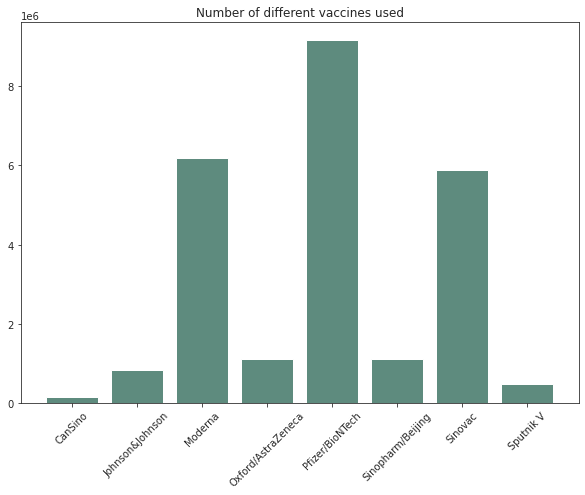

In [12]:
plt.figure(figsize=(10, 7))
plt.bar(vaccine_count['vaccine'], vaccine_count['total_vaccinations'], color=color)
plt.title("Number of different vaccines used")
plt.xticks(rotation=45)

plt.show()

Now let's plot the same graph using Altair:

In [13]:
# remember this is showing mean values and not actual values
alt.Chart(vaccine_count).mark_bar().encode(
    alt.X('vaccine:N', sort='-y'),
    alt.Y('total_vaccinations:Q'),
    alt.Color('vaccine:N'),
    alt.Tooltip(['vaccine', 'total_vaccinations'])
).properties(
    width = 600,
    height = 450
)

alt.Chart(...)

First notice that `altair` is more interactive (*try hovering your mouse pointer over the chart*) and is better looking when compared to `matplotlib`. We will be using altair in our next visualizations.

> From the figure above, we can clearly see that `Pfizer/BioNTech` is the most used vaccine followed by `Moderna`.

### Vaccination done in different countries:

In [14]:
df_mnf.head(10)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-05,Johnson&Johnson,0
1,Austria,2021-01-05,Moderna,0
2,Austria,2021-01-05,Oxford/AstraZeneca,0
3,Austria,2021-01-05,Pfizer/BioNTech,30885
4,Austria,2021-01-12,Johnson&Johnson,0
5,Austria,2021-01-12,Moderna,88
6,Austria,2021-01-12,Oxford/AstraZeneca,0
7,Austria,2021-01-12,Pfizer/BioNTech,115203
8,Austria,2021-01-19,Johnson&Johnson,0
9,Austria,2021-01-19,Moderna,298


In [15]:
# vaccinations done in different countries based on manufacturers
country = df_mnf.groupby(['location'])['total_vaccinations'].mean().\
            to_frame().reset_index()

country.head(8)

,location,total_vaccinations
0,Austria,5.918926e+05
1,Belgium,9.535739e+05
2,Bulgaria,1.842236e+05
3,Chile,4.052253e+06
4,Croatia,2.102652e+05
5,Cyprus,8.009235e+04
6,Czechia,7.505270e+05
7,Denmark,5.019803e+05


In [16]:
alt.Chart(country).mark_bar().encode(
    alt.X('location:N', sort='-y'),
    alt.Y('total_vaccinations:Q'),
    alt.Color('location:N', legend=None),
    alt.Tooltip(['location', 'total_vaccinations'])
).properties(
    width=700,
    height=400
)

alt.Chart(...)

In [17]:
# data vaccination usa
usa = df_mnf[df_mnf['location'] == "United States"]
usa.head()

,location,date,vaccine,total_vaccinations
6875,United States,2021-01-12,Moderna,3835859
6876,United States,2021-01-12,Pfizer/BioNTech,5488697
6877,United States,2021-01-13,Moderna,4249795
6878,United States,2021-01-13,Pfizer/BioNTech,6025872
6879,United States,2021-01-15,Moderna,5122662


In [18]:
chart = alt.Chart(usa).mark_bar().encode(
    alt.X('average(total_vaccinations)'),
    alt.Y('location:N'),
    alt.Color('vaccine:N'),
    alt.Tooltip(['vaccine', 'sum(total_vaccinations)'])
).properties(
    width=700,
    height=50
)

chart

alt.Chart(...)

In [19]:
alt.data_transformers.disable_max_rows()
chart = alt.Chart(df_mnf).mark_bar().encode(
    alt.X('vaccine:N'),
    alt.Y('average(total_vaccinations)'),
    alt.Column('location'),
    alt.Tooltip(['location', 'vaccine', 'average(total_vaccinations)'])
)

chart

alt.Chart(...)

### Vaccines used in United States:

In [20]:
# Vaccines used in USA
print("Vaccines used in United States:\n")
vacc_list = list(usa.vaccine.unique())

for x in range(len(vacc_list)):
  print(f"{x+1}) {vacc_list[x]}")

Vaccines used in United States:

1) Moderna
2) Pfizer/BioNTech
3) Johnson&Johnson


In [21]:
pfizer_usa = alt.Chart(usa, title='Vaccinations over time in the US').mark_line().encode(
    alt.X('date:T'),
    alt.Y('total_vaccinations:Q'),
    alt.Tooltip(['vaccine', 'total_vaccinations']),
    alt.Color('vaccine'),
).properties(
    width=600,
    height=500
)

pfizer_usa

alt.Chart(...)

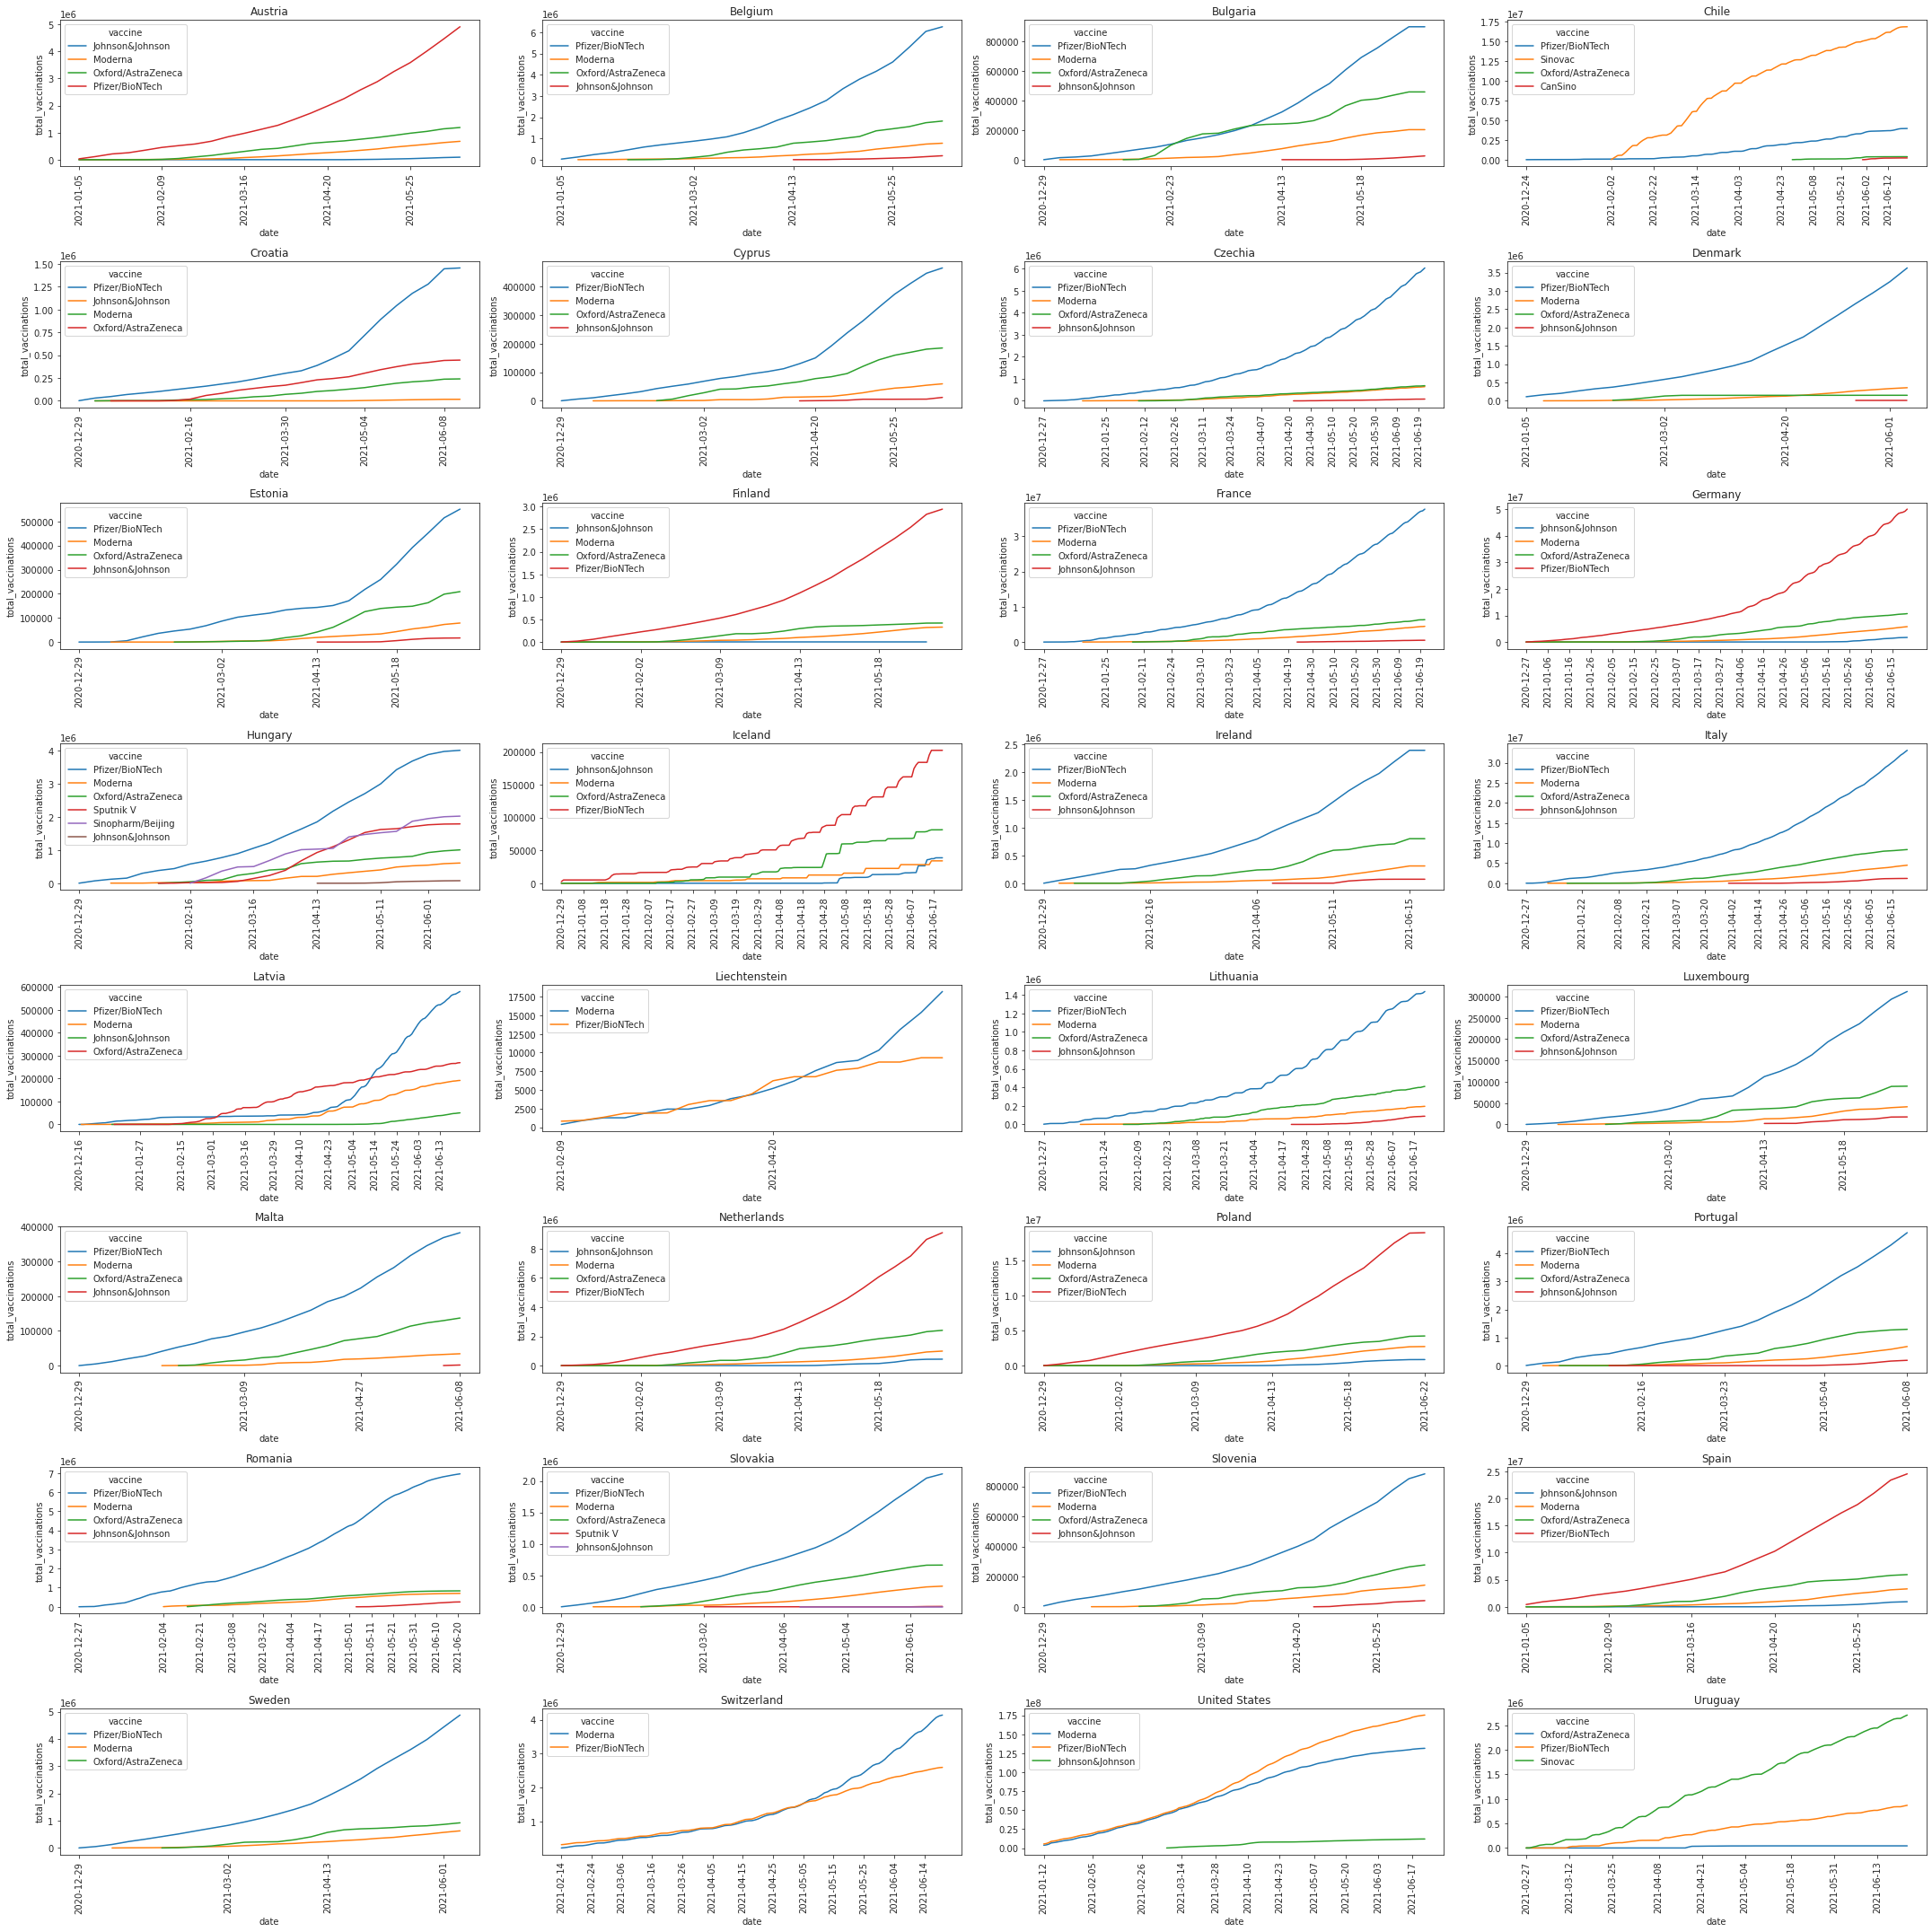

In [22]:
fig = plt.figure(figsize=(30, 30))

for i, v in enumerate(df_mnf['location'].unique()):
    temp_df = df_mnf[df_mnf['location'] == v]
    fig.add_subplot(8, 4, i+1)
    sb.lineplot(data=temp_df, x=temp_df['date'], y=temp_df['total_vaccinations'], hue='vaccine')
    plt.title(v)
    if len(temp_df['date'][::20]) > 15:
        plt.xticks(temp_df['date'][::40], rotation=90)
    else:
        plt.xticks(temp_df['date'][::20], rotation=90)
    
plt.tight_layout()
plt.show()

In [23]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [24]:
# all the countries present in dataset
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fal

# Data on India

In [25]:
# data for India
df_india = df[df['country'] == 'India']

df_india.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
10684,India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
10685,India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
10686,India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
10687,India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
10688,India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/


In [26]:
# shape of dataset
df_india.shape

(159, 15)

In [27]:
# total null values in each column
df_india.isnull().sum()

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      5
people_vaccinated                       5
people_fully_vaccinated                34
daily_vaccinations_raw                 10
daily_vaccinations                      1
total_vaccinations_per_hundred          5
people_vaccinated_per_hundred           5
people_fully_vaccinated_per_hundred    34
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [28]:
# drop the null values
df_india = df_india.dropna()
df_india.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [29]:
df_india.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
10713,India,IND,2021-02-13,8052454.0,8044786.0,7668.0,84807.0,325305.0,0.58,0.58,0.00,236.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
10716,India,IND,2021-02-16,8857341.0,8641002.0,216339.0,340570.0,320826.0,0.64,0.63,0.02,232.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/
10717,India,IND,2021-02-17,9186757.0,8844641.0,342116.0,329416.0,309949.0,0.67,0.64,0.02,225.0,"Covaxin, Oxford/AstraZeneca",Government of India,https://dashboard.cowin.gov.in/


In [30]:
# data types of each column
df_india.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

We need to change the data-type of date column from object to datetime.

In [31]:
# changing to datetime
df_india.date = pd.to_datetime(df_india.date)

df_india.date.dtype

dtype('<M8[ns]')

In [32]:
# total vaccinations in India
total = alt.Chart(df_india).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('total_vaccinations:Q', axis=alt.Axis(title="Total Vaccinations")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','total_vaccinations']),
).properties(
    title='Total Vaccinations Over Time in India',
    width = 500,
    height = 400
)
# people fully vaccinated
people_fully = alt.Chart(df_india).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('people_fully_vaccinated:Q', axis=alt.Axis(title="People Fully Vaccinated")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','people_fully_vaccinated']),
).properties(
    title='People Fully Vaccinated Over Time in India',
    width = 500,
    height = 400
)
# daily vaccinaitons
daily = alt.Chart(df_india).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('daily_vaccinations:Q', axis=alt.Axis(title="Daily Vaccinations")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','daily_vaccinations']),
).properties(
    title='Daily Vaccinations Over Time in India',
    width = 500,
    height = 400
)

# People Fully Vaccinated Per Hundred
per_hundred = alt.Chart(df_india).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('people_fully_vaccinated_per_hundred:Q', axis=alt.Axis(title="People Fully Vaccinated Per Hundred")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','people_fully_vaccinated_per_hundred']),
).properties(
    title='People Fully Vaccinated per hundred in India',
    width = 500,
    height = 400
)

chart = total | people_fully
chart &= daily | per_hundred

chart

alt.VConcatChart(...)

# Data on United States

In [33]:
df_usa = df[df['country'] == 'United States']

df_usa.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
25119,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25120,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25121,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25122,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25123,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...


In [34]:
# handling missing values
df_usa.isnull().sum()

country                                 0
iso_code                                0
date                                    0
total_vaccinations                     15
people_vaccinated                      16
people_fully_vaccinated                30
daily_vaccinations_raw                 26
daily_vaccinations                      1
total_vaccinations_per_hundred         15
people_vaccinated_per_hundred          16
people_fully_vaccinated_per_hundred    30
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [35]:
# dropping rows with missing values
df_usa = df_usa.dropna()

df_usa.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [36]:
df_usa.date.dtype

dtype('O')

In [37]:
# converting to datetime
df_usa.date = pd.to_datetime(df_usa.date)

df_usa.date.dtype

dtype('<M8[ns]')

In [38]:
df_usa.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
25144,United States,USA,2021-01-14,11148991.0,9690757.0,1342086.0,870529.0,747082.0,3.33,2.90,0.40,2234.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25145,United States,USA,2021-01-15,12279180.0,10595866.0,1610524.0,1130189.0,798707.0,3.67,3.17,0.48,2388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25150,United States,USA,2021-01-20,16525281.0,14270441.0,2161419.0,817693.0,892403.0,4.94,4.27,0.65,2668.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...


In [39]:
# total vaccinations in United States
total = alt.Chart(df_usa).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('total_vaccinations:Q', axis=alt.Axis(title="Total Vaccinations")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','total_vaccinations']),
).properties(
    title='Total Vaccinations Over Time in United States',
    width = 500,
    height = 400
)
# people fully vaccinated
people_fully = alt.Chart(df_usa).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('people_fully_vaccinated:Q', axis=alt.Axis(title="People Fully Vaccinated")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','people_fully_vaccinated']),
).properties(
    title='People Fully Vaccinated Over Time in United States',
    width = 500,
    height = 400
)
# daily vaccinaitons
daily = alt.Chart(df_usa).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('daily_vaccinations:Q', axis=alt.Axis(title="Daily Vaccinations")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','daily_vaccinations']),
).properties(
    title='Daily Vaccinations Over Time in United States',
    width = 500,
    height = 400
)

# People Fully Vaccinated Per Hundred
per_hundred = alt.Chart(df_usa).mark_line(size=3, point=True, fill='lightgrey').encode(
    alt.X('date:T', axis=alt.Axis(title="Date")),
    alt.Y('people_fully_vaccinated_per_hundred:Q', axis=alt.Axis(title="People Fully Vaccinated Per Hundred")),
    alt.Color('vaccines:N', legend=alt.Legend(orient='right')),
    alt.Tooltip(['date','people_fully_vaccinated_per_hundred']),
).properties(
    title='People Fully Vaccinated per hundred in United States',
    width = 500,
    height = 400
)

chart = total | people_fully
chart &= daily | per_hundred
chart

alt.VConcatChart(...)

In [40]:
df_usa

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
25144,United States,USA,2021-01-14,11148991.0,9690757.0,1342086.0,870529.0,747082.0,3.33,2.90,0.40,2234.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25145,United States,USA,2021-01-15,12279180.0,10595866.0,1610524.0,1130189.0,798707.0,3.67,3.17,0.48,2388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25150,United States,USA,2021-01-20,16525281.0,14270441.0,2161419.0,817693.0,892403.0,4.94,4.27,0.65,2668.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25151,United States,USA,2021-01-21,17546374.0,15053257.0,2394961.0,1021093.0,913912.0,5.25,4.50,0.72,2733.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25152,United States,USA,2021-01-22,19107959.0,16243093.0,2756953.0,1561585.0,975540.0,5.71,4.86,0.82,2917.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25299,United States,USA,2021-06-18,316048776.0,176290249.0,148459003.0,1079390.0,1362712.0,94.50,52.71,44.39,4075.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25300,United States,USA,2021-06-19,317117797.0,176737141.0,149125164.0,1069021.0,1286438.0,94.82,52.85,44.59,3847.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25301,United States,USA,2021-06-20,317966408.0,177088290.0,149667646.0,848611.0,1234838.0,95.07,52.95,44.75,3692.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
25302,United States,USA,2021-06-21,318576441.0,177342954.0,150046006.0,610033.0,1132945.0,95.26,53.03,44.86,3388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...


In [41]:
# total people vaccinated in usa
# lets plot a pie plot
df_usa.iloc[-1]

country                                                                    United States
iso_code                                                                             USA
date                                                                 2021-06-22 00:00:00
total_vaccinations                                                           319223844.0
people_vaccinated                                                            177635067.0
people_fully_vaccinated                                                      150424675.0
daily_vaccinations_raw                                                          647403.0
daily_vaccinations                                                             1048167.0
total_vaccinations_per_hundred                                                     95.45
people_vaccinated_per_hundred                                                      53.11
people_fully_vaccinated_per_hundred                                                44.98
daily_vaccinations_pe

In [42]:
df_usa.iloc[-1]['people_fully_vaccinated']

150424675.0

In [43]:
# last value in dataset
print(f"Data till date: {df_usa['date'][25303]}")

people_fully_vaccinated = int(df_usa.iloc[-1]['people_fully_vaccinated'])
remaining_pop_1 = 328000000-people_fully_vaccinated
print(f"people_fully_vaccinated: {people_fully_vaccinated}, \
        Remaining Population: {remaining_pop_1}")

people_vaccinated = int(df_usa.iloc[-1]['people_vaccinated'])
remaining_pop_2 = 328000000-people_vaccinated
print(f"people vaccinated: {people_vaccinated}, \
        Remaining Population: {remaining_pop_2}")

print(f"Populatoin of USA (approx): {328000000}")

Data till date: 2021-06-22 00:00:00
people_fully_vaccinated: 150424675,         Remaining Population: 177575325
people vaccinated: 177635067,         Remaining Population: 150364933
Populatoin of USA (approx): 328000000


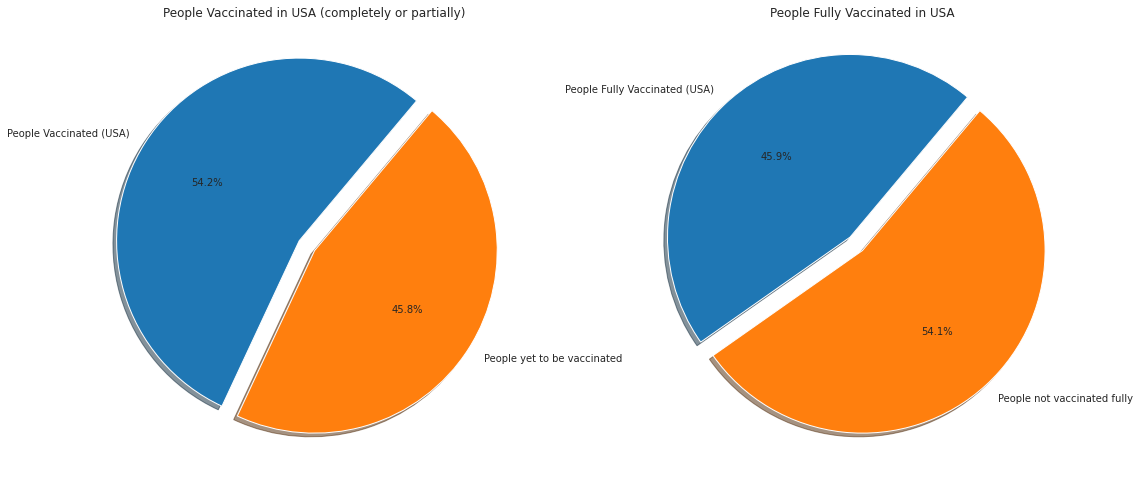

In [44]:
fig = plt.figure(figsize=(18, 10))

# first pie chart
fig.add_subplot(1,2,1)
# data
x = [people_vaccinated,remaining_pop_2]
# labels
labels = ['People Vaccinated (USA)', 'People yet to be vaccinated']
explode = (0.1, 0)
plt.pie(x, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('People Vaccinated in USA (completely or partially)')

# second pie chart
fig.add_subplot(1,2,2)
# data
x = [people_fully_vaccinated,remaining_pop_1]
# labels
labels = ['People Fully Vaccinated (USA)', 'People not vaccinated fully']
explode = (0.1, 0)
plt.pie(x, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('People Fully Vaccinated in USA')

plt.show()